In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Global configuration for plots
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3

# Exercise 1: Logistic Regression on a Toy 2D Dataset


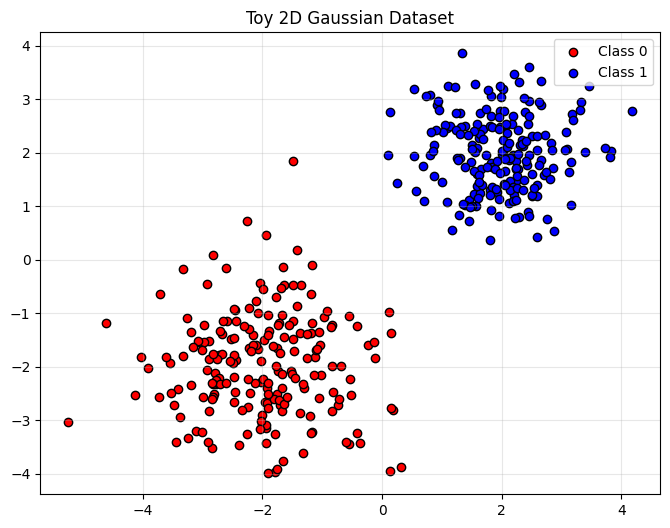

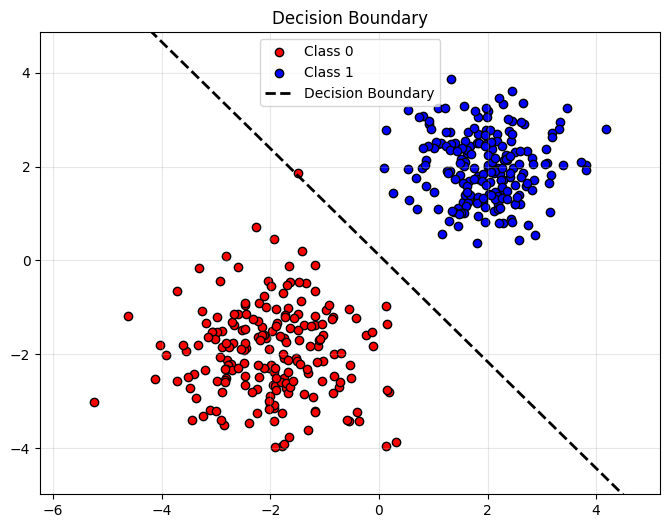

In [15]:
# --- 1. Data Generation ---
N_samples = 200

# Class 0: Centered at (-2, -2), Variance 1
X0 = np.random.normal(loc=-2, scale=1.0, size=(N_samples, 2))
Y0 = np.zeros((N_samples, 1))

# Class 1: Centered at (2, 2), Variance 0.5
X1 = np.random.normal(loc=2, scale=np.sqrt(0.5), size=(N_samples, 2))
Y1 = np.ones((N_samples, 1))

# Combine
X = np.vstack([X0, X1])
Y = np.vstack([Y0, Y1])

# Shuffle
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

# Add Bias Term (Column of 1s)
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# --- 2. Plot Dataset ---
plt.figure()
plt.scatter(X[Y.flatten() == 0][:, 0], X[Y.flatten() == 0][:, 1], c="red", label="Class 0", edgecolors="k")
plt.scatter(X[Y.flatten() == 1][:, 0], X[Y.flatten() == 1][:, 1], c="blue", label="Class 1", edgecolors="k")
plt.title("Toy 2D Gaussian Dataset")
plt.legend()
plt.show()


# --- 3. Core Functions (Sigmoid, BCE, Gradient) ---
def sigmoid(z):
    # Clip for stability
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


def binary_cross_entropy(Theta, X, y):
    N = X.shape[0]
    h = sigmoid(X @ Theta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss


def get_gradient(Theta, X, y):
    N = X.shape[0]
    h = sigmoid(X @ Theta)
    grad = X.T @ (h - y) / N
    return grad


# --- 4. Train with Full Batch Gradient Descent ---
Theta = np.zeros((X_bias.shape[1], 1))
lr = 0.1
epochs = 500
loss_history = []

for _ in range(epochs):
    g = get_gradient(Theta, X_bias, Y)
    Theta -= lr * g
    loss_history.append(binary_cross_entropy(Theta, X_bias, Y))

# --- 5. Visualize Decision Boundary ---
# Boundary condition: Theta^T * x = 0
# theta0 + theta1*x1 + theta2*x2 = 0  =>  x2 = -(theta0 + theta1*x1) / theta2

plt.figure()
plt.scatter(X[Y.flatten() == 0][:, 0], X[Y.flatten() == 0][:, 1], c="red", label="Class 0", edgecolors="k")
plt.scatter(X[Y.flatten() == 1][:, 0], X[Y.flatten() == 1][:, 1], c="blue", label="Class 1", edgecolors="k")

# Generate line points
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_vals = np.linspace(x1_min, x1_max, 100)
x2_vals = -(Theta[0] + Theta[1] * x1_vals) / Theta[2]

plt.plot(x1_vals, x2_vals, "k--", linewidth=2, label="Decision Boundary")
plt.xlim(x1_min, x1_max)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.title("Decision Boundary")
plt.legend()
plt.show()

## Linearity of the Decision Boundary (Logistic Regression)

Logistic Regression models the probability of the positive class as:

    P(y=1 | x) = sigmoid(theta^T x)

where the sigmoid function is:

    sigmoid(z) = 1 / (1 + exp(-z))

---

### Decision Threshold

Using the default threshold P(y=1 | x) = 0.5:

    sigmoid(theta^T x) = 0.5  =>  theta^T x = 0

So the decision boundary is:

    theta_0 + theta_1*x1 + ... + theta_d*xd = 0

---

### Geometric Meaning

This is a **hyperplane**:

- Straight line in 2D
- Plane in 3D
- Hyperplane in higher dimensions

It divides the space into two regions:

    theta^T x > 0  => predict y = 1
    theta^T x < 0  => predict y = 0

---

### Conclusion

Even though the sigmoid is nonlinear, the **decision boundary is linear**, so Logistic Regression is a **linear classifier**.


# Exercise 2: SGD on Logistic Regression


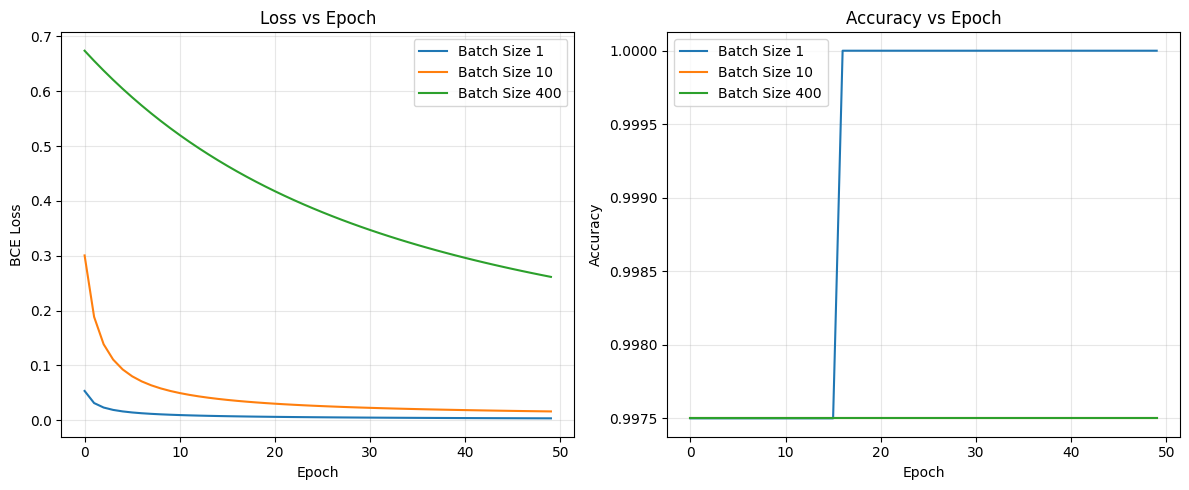

In [16]:
# Hyperparameters
batch_sizes = [1, 10, len(X)]  # SGD, Mini-batch, Full Batch
lr = 0.01
epochs = 50

plt.figure(figsize=(12, 5))

# Loop over batch sizes
for bs in batch_sizes:
    # Re-initialize Theta
    Theta_sgd = np.zeros((X_bias.shape[1], 1))

    losses = []
    accuracies = []

    for epoch in range(epochs):
        # Shuffle data at the start of each epoch
        perm = np.random.permutation(len(X))
        X_shuff = X_bias[perm]
        Y_shuff = Y[perm]

        # Mini-batch updates
        for i in range(0, len(X), bs):
            X_batch = X_shuff[i : i + bs]
            Y_batch = Y_shuff[i : i + bs]

            g = get_gradient(Theta_sgd, X_batch, Y_batch)
            Theta_sgd -= lr * g

        # Track metrics (on full dataset) at end of epoch
        losses.append(binary_cross_entropy(Theta_sgd, X_bias, Y))

        # Accuracy
        preds = (sigmoid(X_bias @ Theta_sgd) >= 0.5).astype(int)
        acc = np.mean(preds == Y)
        accuracies.append(acc)

    # Plot Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(losses, label=f"Batch Size {bs}")

    # Plot Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label=f"Batch Size {bs}")

# Final Formatting
plt.subplot(1, 2, 1)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## Discussion: Stability & Batch Size

### Batch Size Effects

- **Batch Size = 1 (SGD)**

  - Observed behavior: **noisy convergence**
  - Reason: Gradient is computed from a single sample, which can be an outlier or point in a direction different from the global average.
  - Result: Loss curve **wiggles** or oscillates.

- **Batch Size = N (Full Batch)**

  - Observed behavior: **smoothest curve** (monotonic decrease in loss)
  - Reason: Gradient is the **exact average over the entire dataset**.
  - Drawback: Requires computing predictions for all points just to take **one update step**.

- **Batch Size = 10 (Mini-batch)**
  - Observed behavior: **trade-off** between SGD and full batch
  - Reason: Reduces noise compared to SGD while being **faster per update** than full batch.

---

### Why Small Batches Produce Noisy Gradients

- The gradient computed on a batch is a **statistical estimator** of the true gradient.
- By the **Law of Large Numbers**, the variance of this estimator **decreases as batch size increases**.
- Batch size = 1 ⇒ maximum variance ⇒ "noisy" trajectory.


# Exercise 3: Evaluation Metrics on a Synthetic Dataset


In [17]:
def evaluate_metrics(Theta, X, y, threshold=0.5):
    # 1. Probabilities
    probs = sigmoid(X @ Theta)

    # 2. Predictions
    preds = (probs >= threshold).astype(int)

    # 3. Confusion Matrix Elements
    TP = np.sum((preds == 1) & (y == 1))
    TN = np.sum((preds == 0) & (y == 0))
    FP = np.sum((preds == 1) & (y == 0))
    FN = np.sum((preds == 0) & (y == 1))

    # Metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Add epsilon to prevent division by zero
    precision = TP / (TP + FP + 1e-15)
    recall = TP / (TP + FN + 1e-15)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-15)

    return {
        "Threshold": threshold,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "Confusion Matrix": [[TN, FP], [FN, TP]],
    }


# Using the Theta from Exercise 1 (trained with Full Batch)
thresholds = [0.3, 0.5, 0.7]

print(f"{'Threshold':<10} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10} | {'F1':<10}")
print("-" * 60)

for t in thresholds:
    m = evaluate_metrics(Theta, X_bias, Y, t)
    print(
        f"{m['Threshold']:<10.1f} | {m['Accuracy']:<10.4f} | {m['Precision']:<10.4f} | {m['Recall']:<10.4f} | {m['F1']:<10.4f}"
    )

Threshold  | Accuracy   | Precision  | Recall     | F1        
------------------------------------------------------------
0.3        | 0.9975     | 0.9950     | 1.0000     | 0.9975    
0.5        | 0.9975     | 0.9950     | 1.0000     | 0.9975    
0.7        | 1.0000     | 1.0000     | 1.0000     | 1.0000    


## Discussion: Threshold Trade-offs

### Effects of Different Thresholds

- **Lower Threshold (0.3)**

  - The model predicts "Class 1" **more aggressively**.
  - **Pros:** Captures more true positives → **increases Recall**
  - **Cons:** Falsely labels more negatives as positives → **decreases Precision**

- **Higher Threshold (0.7)**
  - The model predicts "Class 1" **only when very confident**.
  - **Pros:** Avoids false positives → **increases Precision**
  - **Cons:** Misses some true positives → **decreases Recall**

---

### Application Dependence

- **Cancer detection:** Prefer **lower threshold** → prioritize **high Recall** because missing a cancer case is far worse than a false alarm.
- **Spam filtering:** Prefer **higher threshold** → prioritize **high Precision** because we don’t want to accidentally lose important emails.


# Exercise 4: Logistic Regression on a Real Dataset


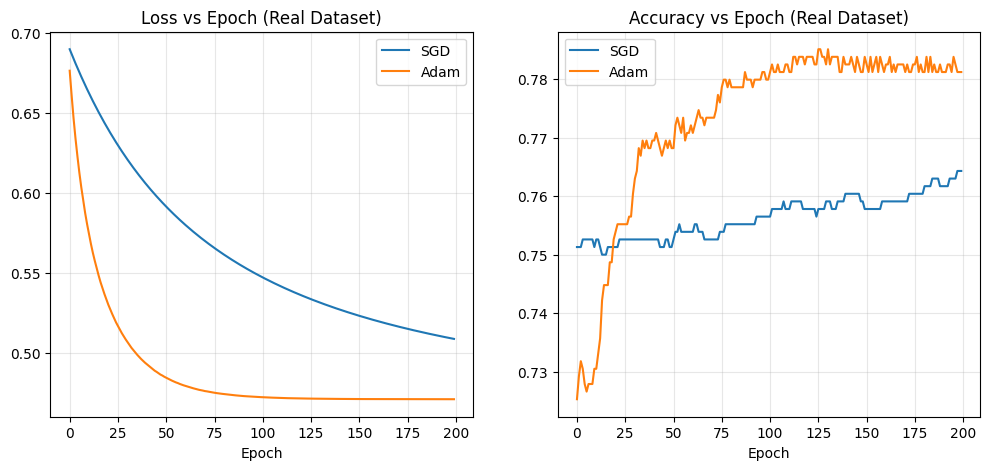

Final SGD Accuracy: 0.7643229166666666
Final Adam Accuracy: 0.78125


In [20]:
# --- 1. Load and Preprocess ---
# Ensure diabetes.csv is in the folder. If using Colab/Binder, upload it.
try:
    df = pd.read_csv("diabetes.csv")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found.")
    # Fallback to creating a dummy df so the code structure is valid for the example
    # (Do not rely on this for real results)
    df = pd.DataFrame(np.random.randn(100, 9), columns=["A", "B", "C", "D", "E", "F", "G", "H", "Outcome"])
    df["Outcome"] = (df["Outcome"] > 0).astype(int)

# Extract Features and Label
X_raw = df.iloc[:, :-1].values
y_pima = df.iloc[:, -1].values.reshape(-1, 1)

# Standardize (Manual Normalization as per Class)
mean = X_raw.mean(axis=0)
std = X_raw.std(axis=0)
# X_norm = (X_raw - mean) / (std + 1e-15)
X_norm = (X_raw - mean) / std

# Add Bias
X_pima = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

# --- 2. Train SGD ---
Theta_sgd = np.zeros((X_pima.shape[1], 1))
lr = 1e-3
epochs = 200
batch_size = 32

sgd_loss = []
sgd_acc = []

for epoch in range(epochs):
    perm = np.random.permutation(len(X_pima))
    X_shuff = X_pima[perm]
    y_shuff = y_pima[perm]

    for i in range(0, len(X_pima), batch_size):
        X_batch = X_shuff[i : i + batch_size]
        y_batch = y_shuff[i : i + batch_size]

        g = get_gradient(Theta_sgd, X_batch, y_batch)
        Theta_sgd -= lr * g

    # Track Full Dataset Metrics
    sgd_loss.append(binary_cross_entropy(Theta_sgd, X_pima, y_pima))
    acc = np.mean((sigmoid(X_pima @ Theta_sgd) >= 0.5) == y_pima)
    sgd_acc.append(acc)

# --- 3. Train Adam ---
Theta_adam = np.zeros((X_pima.shape[1], 1))
m = np.zeros_like(Theta_adam)
v = np.zeros_like(Theta_adam)
beta1, beta2, eps = 0.9, 0.999, 1e-8
t_step = 0

adam_loss = []
adam_acc = []

for epoch in range(epochs):
    perm = np.random.permutation(len(X_pima))
    X_shuff = X_pima[perm]
    y_shuff = y_pima[perm]

    for i in range(0, len(X_pima), batch_size):
        X_batch = X_shuff[i : i + batch_size]
        y_batch = y_shuff[i : i + batch_size]

        g = get_gradient(Theta_adam, X_batch, y_batch)

        # Adam Updates
        t_step += 1
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g**2)

        m_hat = m / (1 - beta1**t_step)
        v_hat = v / (1 - beta2**t_step)

        Theta_adam -= lr * m_hat / (np.sqrt(v_hat) + eps)

    # Track Metrics
    adam_loss.append(binary_cross_entropy(Theta_adam, X_pima, y_pima))
    acc = np.mean((sigmoid(X_pima @ Theta_adam) >= 0.5) == y_pima)
    adam_acc.append(acc)

# --- 4. Plot & Evaluate ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sgd_loss, label="SGD")
plt.plot(adam_loss, label="Adam")
plt.title("Loss vs Epoch (Real Dataset)")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sgd_acc, label="SGD")
plt.plot(adam_acc, label="Adam")
plt.title("Accuracy vs Epoch (Real Dataset)")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Final Metrics
m_sgd = evaluate_metrics(Theta_sgd, X_pima, y_pima)
m_adam = evaluate_metrics(Theta_adam, X_pima, y_pima)

print("Final SGD Accuracy:", m_sgd["Accuracy"])
print("Final Adam Accuracy:", m_adam["Accuracy"])

## Discussion: Normalization and Optimization

### 1. Why Normalization is Required

- **Standardization:** Features are standardized to mean 0 and variance 1.
- **Reason:** Ensures the loss surface is more **spherical** rather than **elongated**.

**Effects of Unnormalized Features:**

- **Conditioning:** Features with vastly different scales (e.g., Age vs. Glucose) create **narrow ellipses** in the loss function contours.
- **Stable Optimization:** In an elongated valley:
  - Gradients point toward the steep walls rather than the minimum.
  - Optimizer must take **tiny steps** to avoid overshooting.
- **Benefit of Normalization:** Allows **larger, stable learning rates** and smoother convergence.

---

### 2. SGD vs. Adam

- **Convergence Speed:** Adam typically converges **faster** than SGD.
- **Oscillation:** Adam produces **smoother loss curves**.
- **Relation to Adaptive Rates:**
  - Adam uses a **per-parameter learning rate** scaled by the history of gradients (`v_t`).
  - Automatically reduces the learning rate for parameters with **high variance** and increases it for **sparse parameters**.
  - This allows Adam to **navigate complex loss landscapes more efficiently** than SGD with a fixed learning rate.


# Optional Extension: From Logistic Regression to a Simple Neural Network


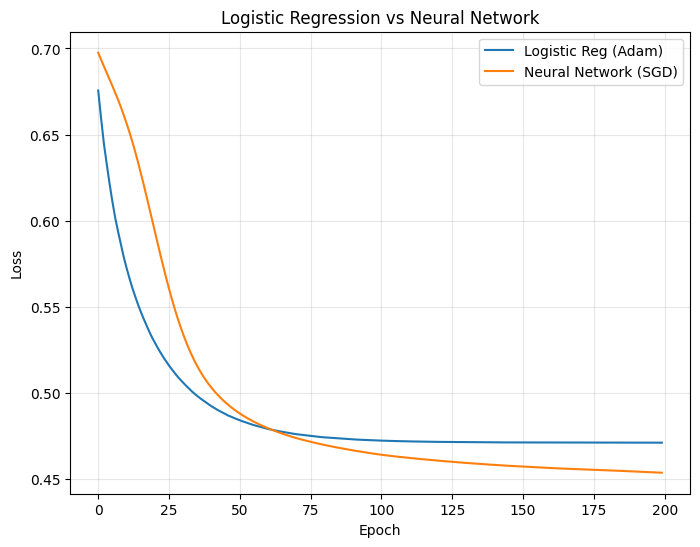

In [19]:
# --- Neural Network Implementation ---
def relu(z):
    return np.maximum(0, z)


def relu_deriv(z):
    return (z > 0).astype(float)


# Architecture
input_dim = X_pima.shape[1]  # Includes bias, though usually bias is internal to layer. We'll use X_pima as is.
hidden_dim = 16
output_dim = 1

# Initialization
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
W2 = np.random.randn(hidden_dim, output_dim) * 0.1

lr_nn = 0.01
epochs_nn = 200
batch_size = 32
nn_loss = []
nn_acc = []

for epoch in range(epochs_nn):
    perm = np.random.permutation(len(X_pima))
    X_shuff = X_pima[perm]
    y_shuff = y_pima[perm]

    for i in range(0, len(X_pima), batch_size):
        X_batch = X_shuff[i : i + batch_size]
        y_batch = y_shuff[i : i + batch_size]
        N_batch = X_batch.shape[0]

        # Forward
        Z1 = X_batch @ W1  # (B, H)
        A1 = relu(Z1)  # (B, H)
        Z2 = A1 @ W2  # (B, 1)
        P = sigmoid(Z2)  # (B, 1)

        # Backprop
        # dL/dZ2 = P - Y (for BCE + Sigmoid)
        dZ2 = (P - y_batch) / N_batch
        dW2 = A1.T @ dZ2

        # dL/dZ1 = (dL/dZ2 * W2.T) * relu'(Z1)
        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * relu_deriv(Z1)
        dW1 = X_batch.T @ dZ1

        # Update (SGD)
        W1 -= lr_nn * dW1
        W2 -= lr_nn * dW2

    # Track Loss/Acc on full set
    Z1_full = X_pima @ W1
    A1_full = relu(Z1_full)
    Z2_full = A1_full @ W2
    P_full = sigmoid(Z2_full)

    loss = -np.mean(y_pima * np.log(P_full + 1e-15) + (1 - y_pima) * np.log(1 - P_full + 1e-15))
    nn_loss.append(loss)
    nn_acc.append(np.mean((P_full >= 0.5) == y_pima))

# Plot Comparison
plt.figure()
plt.plot(adam_loss, label="Logistic Reg (Adam)")
plt.plot(nn_loss, label="Neural Network (SGD)")
plt.title("Logistic Regression vs Neural Network")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Discussion: Neural Network vs Logistic Regression

### Logistic Regression

- **Type:** Linear classifier
- **Behavior:** Attempts to separate "Diabetic" and "Non-Diabetic" classes with a **straight hyperplane** in the high-dimensional feature space.

### Neural Network

- **Hidden Layers:** Transform the inputs using **ReLU activations**.
- **Behavior:** Can learn **non-linear decision boundaries** due to the hidden layer transformations.

### Performance on Pima Dataset

- Neural Network may achieve **slightly lower loss** or **higher accuracy**, suggesting that the relationship between medical markers (e.g., Glucose, BMI) and Diabetes is **not strictly linear**.
- However, with a **small dataset**, simple models like Logistic Regression are often **competitive** and **less prone to overfitting**.
